In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Train.zip'  # update with your zip file path
extract_to = '/content/drive/MyDrive'  # change if you want to unzip to a different folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped to:", extract_to)


Unzipped to: /content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import imghdr
from matplotlib import pyplot as plt

<ipython-input-5-d4d0186c74f1>:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Train')
data_iterator = data.as_numpy_iterator()

Found 19154 files belonging to 10 classes.


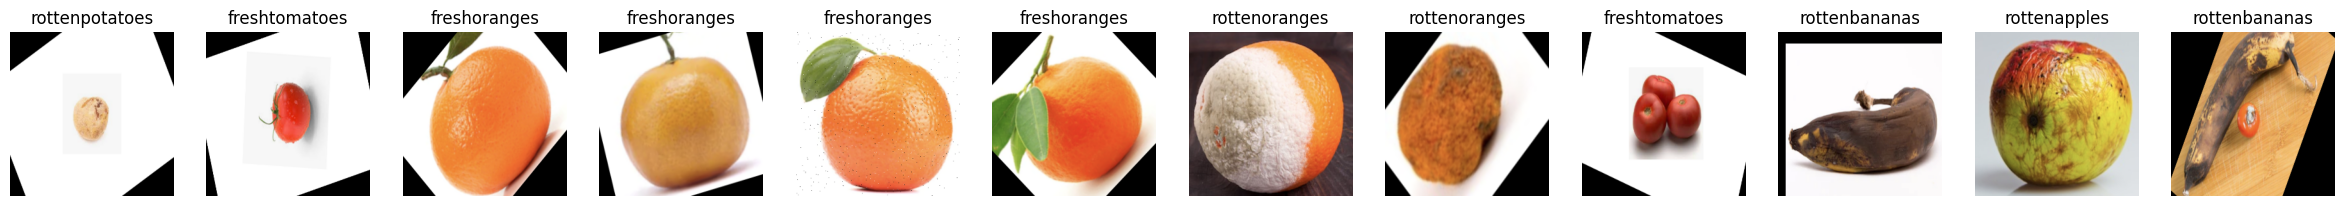

In [ ]:
batch = data_iterator.next()
class_titles = ['freshapple', 'freshbananas', 'freshoranges', 'freshpotatoes',
                'freshtomatoes', 'rottenapples', 'rottenbananas',
                'rottenoranges', 'rottenpotatoes', 'rottentomatoes']

fig, ax = plt.subplots(ncols=12, figsize=(30,30))

# Assuming batch is a tuple containing images and labels
for idx, (img, label) in enumerate(zip(batch[0][:12], batch[1][:12])):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_titles[label])
    ax[idx].axis('off')

plt.show()



In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
print("Total Batches: ", len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

print(train_size, " ", val_size," " , test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Total Batches:  599
419   119   60


In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# Input Layer
model.add(Conv2D(96, (11,11), strides=(4,4), padding='valid', activation='relu', input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Conv Layer 2
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Conv Layer 3
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))

# Conv Layer 4
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))

# Conv Layer 5
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Flatten and FC Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))  # Output layer as per your requirement


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │        49,164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,330,508 (222.51 MB)

 Trainable params: 58,330,508 (222.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 166s 366ms/step - accuracy: 0.2584 - loss: 2.0907 - val_accuracy: 0.6297 - val_loss: 0.9307
Epoch 2/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 186s 347ms/step - accuracy: 0.6584 - loss: 0.8612 - val_accuracy: 0.7697 - val_loss: 0.5916
Epoch 3/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 144s 343ms/step - accuracy: 0.7421 - loss: 0.6577 - val_accuracy: 0.7786 - val_loss: 0.5557
Epoch 4/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 148s 355ms/step - accuracy: 0.7920 - loss: 0.5328 - val_accuracy: 0.8306 - val_loss: 0.4553
Epoch 5/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 144s 344ms/step - accuracy: 0.8334 - loss: 0.4394 - val_accuracy: 0.8524 - val_loss: 0.4048
Epoch 6/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 137s 328ms/step - accuracy: 0.8504 - loss: 0.3835 - val_accuracy: 0.8729 - val_loss: 0.3474
Epoch 7/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 137s 328ms/step - accuracy: 0.8610 - loss: 0.3758 - val_accuracy: 0.8692 - val_loss: 0.3445
Epoch 8/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 145s 346ms/step - accuracy: 0.8885 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108m

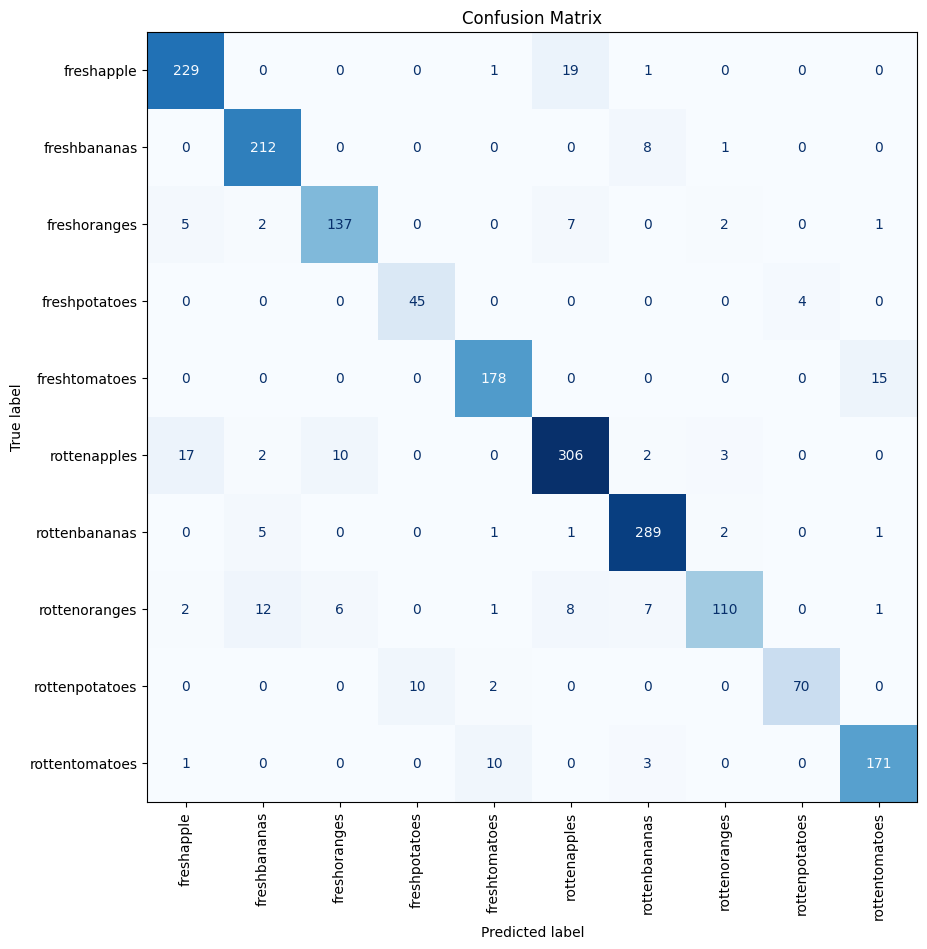

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# CLASSIFICATION REPORT
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_titles))

# CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_titles)

fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(xticks_rotation=90, ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

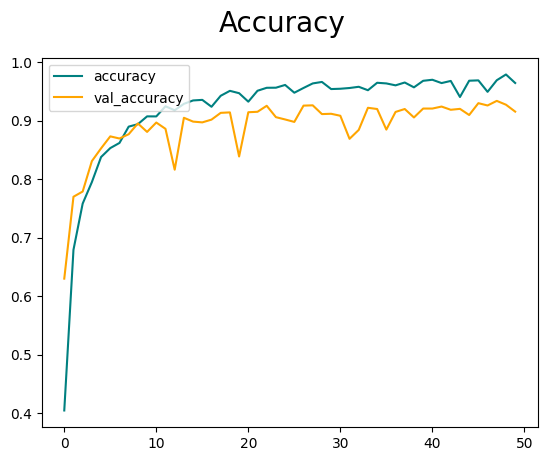

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test)
print('Test accuracy:', test_acc)

60/60 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.9024 - loss: 0.3491
Test accuracy: 0.9098958373069763


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','mymodel1.h5'))

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('models/mymodel1.h5')
y_hat = new_model.predict(test)
print(y_hat)
predicted_classes = np.argmax(y_hat, axis=1)
print(predicted_classes)

60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 148ms/step
[[1.6376953e-15 1.0000000e+00 3.0410100e-16 ... 5.1159334e-20
  6.2638041e-42 3.8339526e-42]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.3417480e-01 1.8136592e-06 7.5314951e-04 ... 2.1112710e-05
  1.4872022e-13 1.2417960e-13]
 ...
 [1.2774119e-10 7.7025421e-11 3.7857269e-12 ... 9.9919409e-01
  1.7347156e-25 1.2685641e-25]
 [1.3255808e-05 1.7458506e-04 6.0856428e-06 ... 1.6652621e-04
  4.4321532e-13 2.5557036e-13]
 [8.9314368e-11 2.4369054e-13 1.0000000e+00 ... 1.5384524e-18
  9.5946906e-42 1.0425661e-41]]
[1 9 0 ... 9 6 2]


**Pre-Trained ViT Model**

In [ ]:
# Install necessary libraries
!pip install -q transformers datasets torch torchvision

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, TrainingArguments, Trainer
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
from datasets import Dataset
import numpy as np
from PIL import Image
import os

# Step 1: Load the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

# Step 2: Define transformation using ViT's expected format
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
])

# Step 3: Load your dataset from '/content/Train'
dataset = ImageFolder(root="/content/Train", transform=transform)

# Step 4: Convert to HuggingFace Dataset
def transform_example(example):
    return {
        "pixel_values": example[0],
        "label": example[1],
    }

hf_dataset = Dataset.from_generator(lambda: map(transform_example, dataset))

# Step 5: Split dataset
hf_dataset = hf_dataset.train_test_split(test_size=0.1)
train_ds = hf_dataset["train"]
val_ds = hf_dataset["test"]

# Step 6: Set format for PyTorch
train_ds.set_format(type="torch")
val_ds.set_format(type="torch")

# Step 7: Load ViT model (ignore mismatched size since we're changing label count)
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=10,
    ignore_mismatched_sizes=True
)

# Step 8: Training arguments
training_args = TrainingArguments(
    output_dir="./vit-custom",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    # evaluation_strategy="epoch",
    logging_dir="./logs",
    save_strategy="no",
    report_to="none"
)

# Step 9: Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

# Step 10: Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics
)

# Step 11: Train
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-43-79ebb7d66de1>:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.143800
1000,0.014100
1500,0.011000
2000,0.003600
2500,0.002000
3000,0.000100


TrainOutput(global_step=3160, training_loss=0.027619854064622917, metrics={'train_runtime': 1126.8035, 'train_samples_per_second': 22.404, 'train_steps_per_second': 2.804, 'total_flos': 1.9564255463497114e+18, 'train_loss': 0.027619854064622917, 'epoch': 5.0})